/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


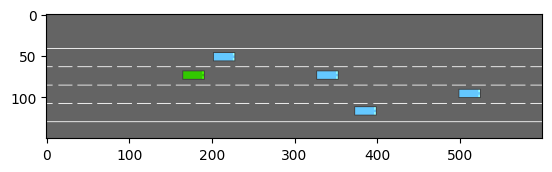

In [5]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('highway-v0')
env.reset()

for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.metadata['render_fps'] = 14
    env.render()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [6]:
import pprint

env = gym.make("highway-v0")
pprint.pprint(env.config)


{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


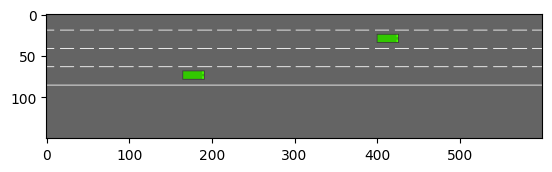

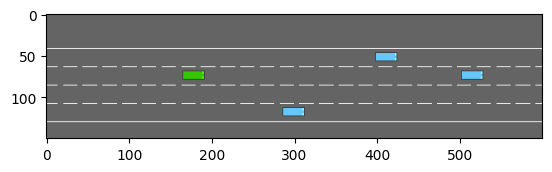

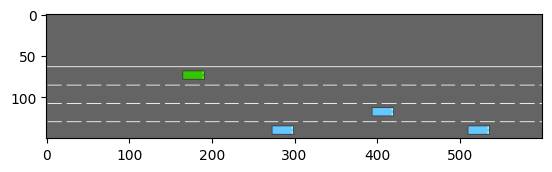

In [18]:
env.config["lanes_count"] = 4
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

env.config["vehicles_count"] = 6
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

env.config["controlled_vehicles"] = 2
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()


/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(
/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


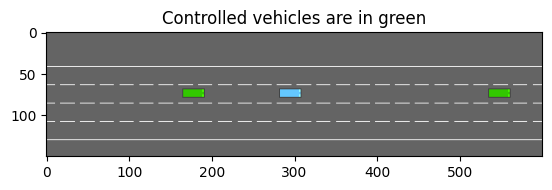

In [3]:
import gym
import highway_env

env = gym.make('highway-v0')

env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env.configure({"vehicles_count": 1})  # A single other vehicle, for the sake of visualisation
env.reset(seed=0)

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(env.render(mode="rgb_array"))
env.metadata['render_fps'] = 14
plt.title("Controlled vehicles are in green")
plt.show()

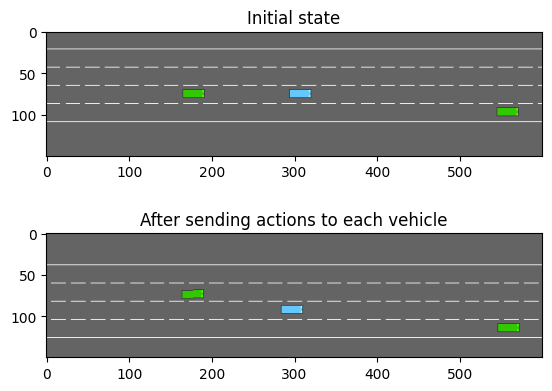

In [9]:
env.configure({
  "action": {
    "type": "MultiAgentAction",
    "action_config": {
      "type": "DiscreteMetaAction",
    }
  }
})
env.reset()

_, (ax1, ax2) = plt.subplots(nrows=2)
ax1.imshow(env.render(mode="rgb_array"))
ax1.set_title("Initial state")

# Make the first vehicle change to the left lane, and the second one to the right
action_1, action_2 = 0, 2  # See highway_env.envs.common.action.DiscreteMetaAction.ACTIONS_ALL
env.step((action_1, action_2))

ax2.imshow(env.render(mode="rgb_array"))
ax2.set_title("After sending actions to each vehicle")
plt.show()

In [10]:
env.configure({
  "observation": {
    "type": "MultiAgentObservation",
    "observation_config": {
      "type": "Kinematics",
    }
  }
})
obs, info = env.reset()

import pprint
pprint.pprint(obs)

(array([[ 1.        ,  0.9198396 ,  0.        ,  0.3125    ,  0.        ],
       [ 1.        ,  0.10875448,  0.5       , -0.04503061,  0.        ],
       [ 1.        ,  0.31681508,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32),
 array([[1.    , 1.    , 0.    , 0.3125, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]], dtype=float32))


In [11]:
import gym
import highway_env
import pprint
from stable_baselines3 import DQN


env1 = gym.make("highway-fast-v0")
pprint.pprint(env1.config)



{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 30,
 'ego_spacing': 1.5,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 5,
 'vehicles_count': 20,
 'vehicles_density': 1}


/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


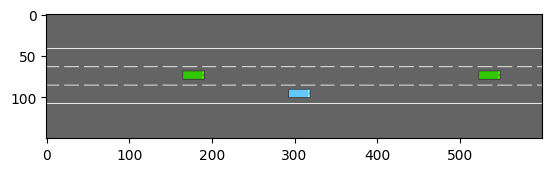

{'action': {'action_config': {'type': 'DiscreteMetaAction'},
            'type': 'MultiAgentAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': 0.2,
 'controlled_vehicles': 2,
 'duration': 30,
 'ego_spacing': 1.5,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'observation_config': {'type': 'Kinematics'},
                 'type': 'MultiAgentObservation'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 5,
 'vehicles_count': 1,
 'vehicles_density': 1}


In [16]:
env1.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env1.configure({"vehicles_count": 1})  # A single other vehicle, for the sake of visualisation
env1.configure({"collision_reward": 0.2}) 
env1.reset(seed=0)

# Multi-agent environment configuration
env1.configure({
  "controlled_vehicles": 2,
  "observation": {
    "type": "MultiAgentObservation",
    "observation_config": {
      "type": "Kinematics",
    }
  },
  "action": {
    "type": "MultiAgentAction",
    "action_config": {
      "type": "DiscreteMetaAction",
    }
  }
})

env1.reset()
plt.imshow(env1.render(mode="rgb_array"))
plt.show()
pprint.pprint(env1.config)

In [17]:


model1 = DQN('MlpPolicy', env1,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model1.learn(int(2e4))
model1.save("highway_dqn/model1")

model1 = DQN.load("highway_dqn/model1", env=env1)




Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


AssertionError: The algorithm only supports (<class 'gym.spaces.discrete.Discrete'>,) as action spaces but Tuple(Discrete(5), Discrete(5)) was provided

In [ ]:
while True:
  vec_env = model.get_env()
  done = truncated = False
  obs= vec_env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    action, _states  = tuple(model.predict(obs_i, deterministic=True) for obs_i in obs)
    next_obs, reward, done, info = vec_env.step(action)
      # Update the model with the transitions observed by each agent
    for obs_i, action_i, next_obs_i in zip(obs, action, next_obs):
    model.update(obs_i, action_i, next_obs_i, reward, info, done, truncated)
    #env.metadata['render_fps'] = 14
    obs = next_obs
    vec_env.render()


In [ ]:

# Dummy RL algorithm
class Model:
  """ Dummy code for an RL algorithm, which predicts an action from an observation,
  and update its model from observed transitions."""

  def predict(self, obs):
    return 0

  def update(self, obs, action, next_obs, reward, info, done, truncated):
    pass
model = Model()

# A training episode
obs, info = env.reset()
done = truncated = False
while not (done or truncated):
  # Dispatch the observations to the model to get the tuple of actions
  action = tuple(model.predict(obs_i) for obs_i in obs)
  # Execute the actions
  next_obs, reward, done, truncated, info = env.step(action)
  # Update the model with the transitions observed by each agent
  for obs_i, action_i, next_obs_i in zip(obs, action, next_obs):
    model.update(obs_i, action_i, next_obs_i, reward, info, done, truncated)
  obs = next_obs

In [1]:
# Load and test saved model
model = DQN.load("highway_dqn/model", env=env)

while True:
  vec_env = model.get_env()
  done = truncated = False
  obs= vec_env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    env.metadata['render_fps'] = 14
    vec_env.render()



NameError: name 'DQN' is not defined

In [2]:
import gym
import highway_env
from stable_baselines3 import DQN

env = gym.make("highway-fast-v0")
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
#model = DQN.load("highway_dqn/model")
#while True:
 # done = truncated = False
 # obs, info = env.reset()
 # while not (done or truncated):
 #   action, _states = model.predict(obs, deterministic=True)
 #   obs, reward, done, truncated, info = env.step(action)
    #env.metadata['render_fps'] = 14
 #   env.render()

 # Load and test saved model
model = DQN.load("highway_dqn/model", env=env)

while True:
  vec_env = model.get_env()
  done = truncated = False
  obs= vec_env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    #env.metadata['render_fps'] = 14
    vec_env.render()

/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(
2022-12-05 18:44:07.769334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 18:44:09.499472: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_O

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 2.5      |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 12       |
|    total_timesteps  | 16       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.88     |
|    ep_rew_mean      | 6.24     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 15       |
|    total_timesteps  | 71       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.58     |
| 

/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


KeyboardInterrupt: 

In [ ]:
import gym
import highway_env
from stable_baselines3 import DQN

env = gym.make("highway-fast-v0")
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
#model = DQN.load("highway_dqn/model")
#while True:
 # done = truncated = False
 # obs, info = env.reset()
 # while not (done or truncated):
 #   action, _states = model.predict(obs, deterministic=True)
 #   obs, reward, done, truncated, info = env.step(action)
    #env.metadata['render_fps'] = 14
 #   env.render()

 # Load and test saved model
model = DQN.load("highway_dqn/model", env=env)

while True:
  vec_env = model.get_env()
  done = truncated = False
  obs= vec_env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    #env.metadata['render_fps'] = 14
    vec_env.render()

/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(
2022-12-05 18:44:07.769334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 18:44:09.499472: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_O

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4        |
|    ep_rew_mean      | 2.5      |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 12       |
|    total_timesteps  | 16       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.88     |
|    ep_rew_mean      | 6.24     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 15       |
|    total_timesteps  | 71       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.58     |
| 

/home/rohit/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


KeyboardInterrupt: 